In [55]:
import requests

In [56]:
from bs4 import BeautifulSoup as bs

In [57]:
import matplotlib.pyplot as plt

In [58]:
from wordcloud import WordCloud

In [59]:
import nltk

In [60]:
from nltk.corpus import stopwords

In [61]:
import re 

In [78]:
iphone_snapdeal=[]

In [79]:
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="

In [80]:
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

In [81]:
for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip

In [82]:
iphone_snapdeal = list(set(iphone_snapdeal))

In [83]:
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [84]:
ip_rev_string = " ".join(iphone_snapdeal)

In [85]:
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [86]:
ip_reviews_words = ip_rev_string.split(" ")

In [90]:
with open("C:/Users/elcot/Downloads/stop.txt","r") as sw:
    stopwords = sw.read()

In [91]:
stopwords = stopwords.split("\n")

In [92]:
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]

['this', 'awsome', 'Data', 'Science']

In [93]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [94]:
ip_rev_string = " ".join(ip_reviews_words)

In [95]:
ip_rev_string

'good phone price category manufacturers warranty pros picture quality awesome sound hearing ad good feel good cons transfer files bluetooth andriod blackberry windows iphone file transfer app shareit good iphone till iphone snapdeal time delivery stars good product delivered time committed true money awsme delivry time product recievd good condition awsme site shoping excellent product recommended friends family members phone good ios os safe phone great consists plastic body metal body good bt dt nt means plastic body cheap plastic nice camera superb battery dere problem dat space bt dis phone problem hv chosen gb phone flaw word phone dis price thumbs apple awesome iphone price range recommend phone lovely fastest super good product packing good issue courier service days deliver marvallous phone buy awesome phone offer product customer care good great experience iphone snapdeal delivery expectation excellent product good service snap deal price delivery service good received order 

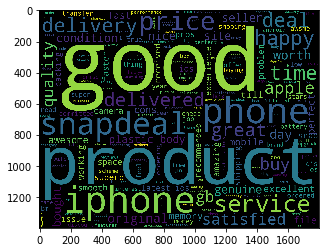

In [96]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

In [97]:
with open("C:/Users/elcot/Downloads/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [98]:
poswords = poswords[36:]

In [99]:
with open("C:/Users/elcot/Downloads/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [100]:
negwords = negwords[37:]

In [101]:
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

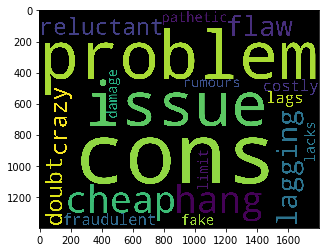

In [102]:
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)

In [103]:
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

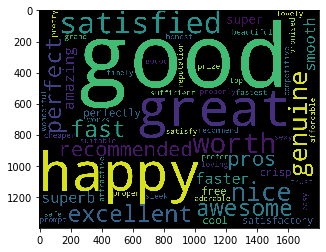

In [104]:
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)